#### Title: "Sentiment Analysis of UK Twitter Users on Boris Johnson's Resignation"

<h3>Description:</h3>
<p><b>This project employs sentiment analysis techniques to gauge the sentiments of UK Twitter users towards Boris Johnson's resignation as Prime Minister. By aggregating tweets using specific hashtags related to his resignation, we aim to reveal the prevailing public sentiment, shedding light on reactions, concerns, and emotions surrounding this significant political event.</b></p>

### Script to scrape twitter data

<p>This script can be used to extract the tweets relating to specific hashtags between specfied timelines.</p>

In [ ]:
# -*- coding: utf-8 -*-
"""
Created on Mon Aug 15 18:04:22 2022

@author: user
"""
import snscrape.modules.twitter as sntwitter
import pandas as pd
import datetime
from datetime import date
from time import sleep
from tqdm import tqdm

#TwitterSearchScraper('{} since:{} until:{}'.format(word, start_date, end_date))




word = input('Enter your word or words seperated by comma: ').split(',')
number = int(input('How many tweet do you want to scrape: '))

print("Please enter the date in yyyy-mm-dd format")

start_date = input('enter start date with hyphae in between: ')
end_date = input('enter end_date with hyphae in between: ')




#Creating list to append tweet data to
tweets_list=[]
#Using Twitter SearchScraper to scrape data and append tweets to list
for i,tweet in enumerate(sntwitter.TwitterSearchScraper
                         ('{} since:{} until:{}'.format(word,
                                                        start_date,
                                                        end_date)
                          ).get_items()):
    if i > number:
        break
    tweets_list.append([tweet.date,
                       tweet.user.username, tweet.content, 
                       tweet.likeCount, tweet.quoteCount,
                       tweet.retweetCount, 
                       tweet.replyCount, tweet.url])
    
df = pd.DataFrame(tweets_list, columns=['date','username' , 
                                       'content', 
                                       'likes','quotes', 
                                       'retweets','reply' , 'url' ])

df.to_csv('tweets_list.csv', index =False)


<h1>Data Wrangling</h1>

In [1]:
import pandas as pd
import numpy as np
import datetime
import seaborn as sns
import matplotlib as mp
import matplotlib.pyplot as plt
plt.style.use ('ggplot')
from matplotlib.pyplot import figure
mp.rcParams['figure.figsize'] = (12,8)
%matplotlib inline
sns.set(font_scale = 1.2)

import re
import spacy
from spacy import displacy
from collections import Counter
import en_core_web_sm
nlp = en_core_web_sm.load()

from wordcloud import WordCloud

from textblob import TextBlob

<h1>Loading dataset</h1>

In [4]:
dfb = pd.read_csv('Boris Johnson 10000.csv')
dfn = pd.read_csv('Notmyprimeminister300.csv')
dfs = pd.read_csv('Sinkingship150.csv')

In [5]:
dfb.head()

,date,username,content,likes,quotes,retweets,reply,url
0,2022-07-12 23:55:15+00:00,AgenciaANSA,Ocho #Candidatos en carrera para #DowningStree...,0,0,0,0,https://twitter.com/AgenciaANSA/status/1547006...
1,2022-07-12 23:54:38+00:00,DanielJames1066,"Let's not beat around the bush, is this the us...",2,0,0,1,https://twitter.com/DanielJames1066/status/154...
2,2022-07-12 23:51:50+00:00,magicdel,#BetterCallSaul #BorisJohnson https://t.co/GFx...,2,0,0,0,https://twitter.com/magicdel/status/1547005844...
3,2022-07-12 23:49:46+00:00,GreenTaraTarot,Boris Trumpclone is determined to hold onto hi...,1,0,0,0,https://twitter.com/GreenTaraTarot/status/1547...
4,2022-07-12 23:48:26+00:00,Infelixuk,@BorisJohnson #BorisJohnson #BorisOut https://...,0,0,0,0,https://twitter.com/Infelixuk/status/154700499...


In [6]:
dfb.shape

(10001, 8)

In [7]:
dfn.head()

,date,username,content,likes,quotes,retweets,reply,url
0,2022-07-19 22:40:48+00:00,SwerianBot,@BorisJohnson #joke : 'After tweeting somethin...,0,0,0,0,https://twitter.com/SwerianBot/status/15495246...
1,2022-07-19 22:30:04+00:00,SwerianBot,Reality check @charlhennessy1 @BorisJohnson #j...,0,0,0,0,https://twitter.com/SwerianBot/status/15495219...
2,2022-07-19 21:50:29+00:00,SwerianBot,oh FFS @BenjaminHeinri7 Remember when @BorisJo...,0,0,0,0,https://twitter.com/SwerianBot/status/15495120...
3,2022-07-19 16:30:40+00:00,SwerianBot,Hey @Allseeingfly1 @BorisJohnson #joke : 'If y...,0,0,0,0,https://twitter.com/SwerianBot/status/15494315...
4,2022-07-19 13:40:06+00:00,SwerianBot,"Oh, for Christ sake @MCY1X @BorisJohnson #fact...",1,0,0,0,https://twitter.com/SwerianBot/status/15493886...


In [8]:
dfn.shape

(297, 8)

In [9]:
dfn.head()

,date,username,content,likes,quotes,retweets,reply,url
0,2022-07-19 22:40:48+00:00,SwerianBot,@BorisJohnson #joke : 'After tweeting somethin...,0,0,0,0,https://twitter.com/SwerianBot/status/15495246...
1,2022-07-19 22:30:04+00:00,SwerianBot,Reality check @charlhennessy1 @BorisJohnson #j...,0,0,0,0,https://twitter.com/SwerianBot/status/15495219...
2,2022-07-19 21:50:29+00:00,SwerianBot,oh FFS @BenjaminHeinri7 Remember when @BorisJo...,0,0,0,0,https://twitter.com/SwerianBot/status/15495120...
3,2022-07-19 16:30:40+00:00,SwerianBot,Hey @Allseeingfly1 @BorisJohnson #joke : 'If y...,0,0,0,0,https://twitter.com/SwerianBot/status/15494315...
4,2022-07-19 13:40:06+00:00,SwerianBot,"Oh, for Christ sake @MCY1X @BorisJohnson #fact...",1,0,0,0,https://twitter.com/SwerianBot/status/15493886...


In [10]:
dfs.head()

,date,username,content,likes,quotes,retweets,reply,url
0,2022-07-19 20:25:52+00:00,TamplonaBULL,#sinkingship #potus https://t.co/uSBkvRPwTr,0,0,0,0,https://twitter.com/TamplonaBULL/status/154949...
1,2022-07-19 14:55:10+00:00,Shanoya30151199,Let a life of peace and contentment be my fate...,27,2,7,10,https://twitter.com/Shanoya30151199/status/154...
2,2022-07-18 19:33:56+00:00,acdoctor88,#TheRatsAreRunning\n#SinkingShip\n#MakeFauciWa...,0,0,0,0,https://twitter.com/acdoctor88/status/15491152...
3,2022-07-18 14:31:23+00:00,OGMcDuff,@biancoresearch ... #sinkingship https://t.co/...,0,0,0,1,https://twitter.com/OGMcDuff/status/1549039130...
4,2022-07-18 12:52:08+00:00,Tit0dev,Ball Destroyer game 🔥🎯🔥😍🎮\nTry it now!\nOn Pla...,0,1,0,0,https://twitter.com/Tit0dev/status/15490141538...


In [11]:
dfs.shape

(119, 8)

<h2>Merging the three dataset</h2>

In [12]:
df = pd.concat([dfb, dfn, dfs])

In [13]:
df.head()

,date,username,content,likes,quotes,retweets,reply,url
0,2022-07-12 23:55:15+00:00,AgenciaANSA,Ocho #Candidatos en carrera para #DowningStree...,0,0,0,0,https://twitter.com/AgenciaANSA/status/1547006...
1,2022-07-12 23:54:38+00:00,DanielJames1066,"Let's not beat around the bush, is this the us...",2,0,0,1,https://twitter.com/DanielJames1066/status/154...
2,2022-07-12 23:51:50+00:00,magicdel,#BetterCallSaul #BorisJohnson https://t.co/GFx...,2,0,0,0,https://twitter.com/magicdel/status/1547005844...
3,2022-07-12 23:49:46+00:00,GreenTaraTarot,Boris Trumpclone is determined to hold onto hi...,1,0,0,0,https://twitter.com/GreenTaraTarot/status/1547...
4,2022-07-12 23:48:26+00:00,Infelixuk,@BorisJohnson #BorisJohnson #BorisOut https://...,0,0,0,0,https://twitter.com/Infelixuk/status/154700499...


In [14]:
df.date = pd.to_datetime(df.date).dt.date

In [15]:
df.head()

,date,username,content,likes,quotes,retweets,reply,url
0,2022-07-12,AgenciaANSA,Ocho #Candidatos en carrera para #DowningStree...,0,0,0,0,https://twitter.com/AgenciaANSA/status/1547006...
1,2022-07-12,DanielJames1066,"Let's not beat around the bush, is this the us...",2,0,0,1,https://twitter.com/DanielJames1066/status/154...
2,2022-07-12,magicdel,#BetterCallSaul #BorisJohnson https://t.co/GFx...,2,0,0,0,https://twitter.com/magicdel/status/1547005844...
3,2022-07-12,GreenTaraTarot,Boris Trumpclone is determined to hold onto hi...,1,0,0,0,https://twitter.com/GreenTaraTarot/status/1547...
4,2022-07-12,Infelixuk,@BorisJohnson #BorisJohnson #BorisOut https://...,0,0,0,0,https://twitter.com/Infelixuk/status/154700499...


In [16]:
print(df.content[:15])

0     Ocho #Candidatos en carrera para #DowningStree...
1     Let's not beat around the bush, is this the us...
2     #BetterCallSaul #BorisJohnson https://t.co/GFx...
3     Boris Trumpclone is determined to hold onto hi...
4     @BorisJohnson #BorisJohnson #BorisOut https://...
5     #BorisJohnson #ReinoUnido Las claves de la cue...
6     @BorisJohnson: the worst Prime Minister ever.\...
7     @vicderbyshire @BBCNews  @c4newsteam quite rig...
8     #BorisJohnson  made it clear right from the st...
9     Credo che la #Russia di #Putin sia dietro le m...
10     https://t.co/bG729gDDKb. #BorisJohnson #manchild
11    🎙NEW EPISODE (Thursday’s) - THE POLITICRAT dai...
12    Tell the government it must NOT betray animals...
13    @SmallBigWord The Labour Party has not genuine...
14            🤣🤣🤣 #BorisJohnson https://t.co/oFthxWKXsN
Name: content, dtype: object


In [17]:
df.shape

(10417, 8)

<h1>Exploratory Data Analysis</h1>

Here I want to look at the volume of tweets containing this hashtags from the start date to the end date of this study, i want to see the trend and the decline in this tweets before the end date. 

grouping each tweets according to their dates, with the correspondind total number of tweets in front of each date

In [18]:
tw_d = df.groupby('date').size()
tw_d

date
2022-07-07      81
2022-07-08    1484
2022-07-09    3604
2022-07-10    2031
2022-07-11    1687
2022-07-12    1366
2022-07-13      26
2022-07-14      23
2022-07-15      19
2022-07-16      26
2022-07-17      25
2022-07-18      27
2022-07-19      18
dtype: int64

Plotting a line graph to display the volumne of tweets containing the hashtags across the period.

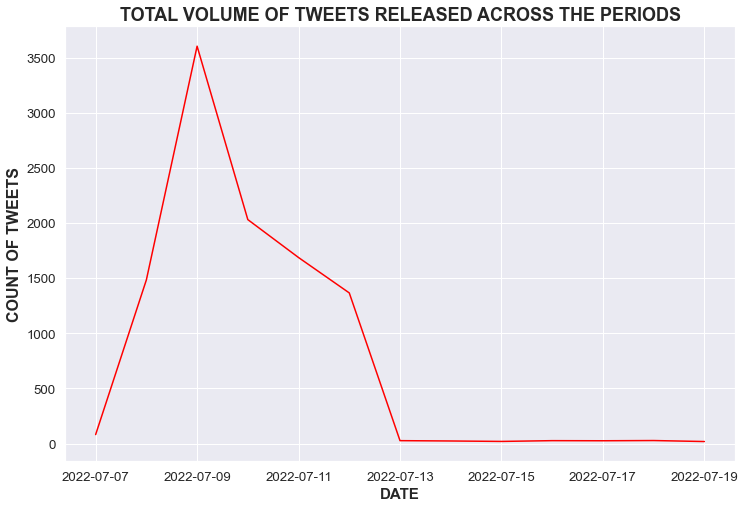

In [67]:
sns.set_style('darkgrid')
tw_d.plot(color='red', figsize = (12,8))
plt.title('TOTAL VOLUME OF TWEETS RELEASED ACROSS THE PERIODS', fontsize= 18, weight = "bold")
plt.xlabel('DATE', fontsize= 15, weight = "bold")
plt.ylabel('COUNT OF TWEETS', fontsize= 16, weight = "bold");
plt.show()

I need to perform further analysis on the tweet content, but before i can do this, i need clean the content. visually checking the content column one can see the content contains symbols like @ sign, semicolons, it als0 contains links, also there is need to remove the # in the hashatags or any # that migt be contained in the tweet

First i will define a function that will clean the tweet contents and remove all this ealier mentioned parameters

In [21]:
#clean the tweets and add a new column of the clean data
def cleaner(tweet):
    tweet = re.sub("@[A-Za-z8-9]+","",tweet)#Removing @ sign
    tweet = re.sub(r"(?:\@|http?\://|https?\://|www)\S+","",tweet) #Removing http links
    tweet = " ".join(tweet.split())
    tweet = tweet.replace("#","").replace("_", " ") #remove hashtag sign but keep the text
    tweet = tweet.replace(":","").replace("_", " ")#remove hashtag sign but keep the text
    tweet = tweet.lstrip(' ') #removing leading spaces
    return tweet

I'm going to apply my function on the content column and create a new column to hold my cleaned tweet from the content column.

In [22]:
df['cleaned_content'] =df['content'] . map(lambda x: cleaner(x))

In [23]:
df.head()

,date,username,content,likes,quotes,retweets,reply,url,clean
0,2022-07-12,AgenciaANSA,Ocho #Candidatos en carrera para #DowningStree...,0,0,0,0,https://twitter.com/AgenciaANSA/status/1547006...,Ocho Candidatos en carrera para DowningStreet ...
1,2022-07-12,DanielJames1066,"Let's not beat around the bush, is this the us...",2,0,0,1,https://twitter.com/DanielJames1066/status/154...,"Let's not beat around the bush, is this the us..."
2,2022-07-12,magicdel,#BetterCallSaul #BorisJohnson https://t.co/GFx...,2,0,0,0,https://twitter.com/magicdel/status/1547005844...,BetterCallSaul BorisJohnson
3,2022-07-12,GreenTaraTarot,Boris Trumpclone is determined to hold onto hi...,1,0,0,0,https://twitter.com/GreenTaraTarot/status/1547...,Boris Trumpclone is determined to hold onto hi...
4,2022-07-12,Infelixuk,@BorisJohnson #BorisJohnson #BorisOut https://...,0,0,0,0,https://twitter.com/Infelixuk/status/154700499...,BorisJohnson BorisOut


In [24]:
df.to_csv('analysisoftweets.csv')

In [25]:
#checking the cleaned_content column
df.cleaned_content[:10]

0    Ocho Candidatos en carrera para DowningStreet ...
1    Let's not beat around the bush, is this the us...
2                          BetterCallSaul BorisJohnson
3    Boris Trumpclone is determined to hold onto hi...
4                                BorisJohnson BorisOut
5    BorisJohnson ReinoUnido Las claves de la cuent...
6    the worst Prime Minister ever. BorisJohnson do...
7    4newsteam quite right too, how can BorisJohnso...
8    BorisJohnson made it clear right from the star...
9    Credo che la Russia di Putin sia dietro le min...
Name: clean, dtype: object

<h3>Creating a word cloud from the cleaned_content coumn to see the most frequent used word</h3>
Word Cloud is a data visualization technique used for representing text data in which the size of each word indicates its frequency or importance. Significant textual data points can be highlighted using a word cloud. Word clouds are widely used for analyzing data from social network websites.

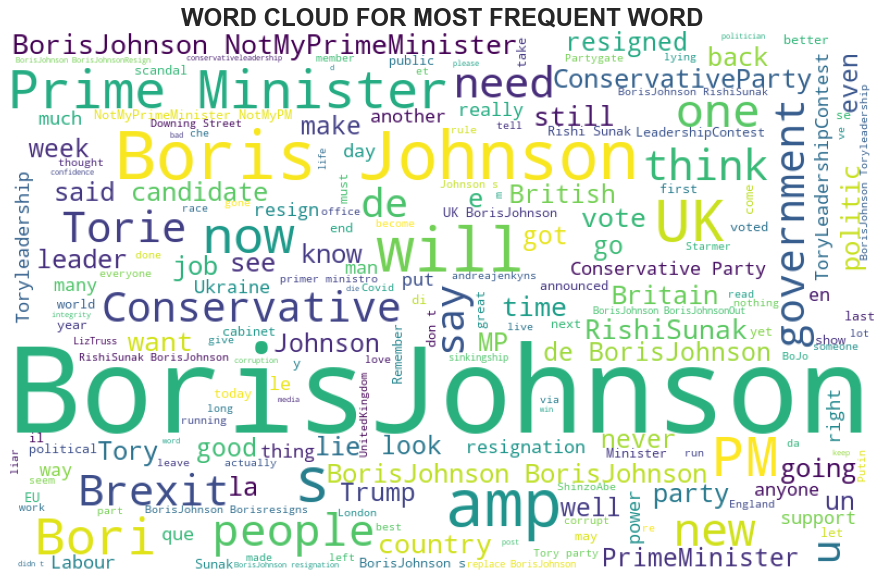

In [47]:
#create a wordcloud to view the most used words in the cleaned tweets
all_words=' '.join([text for text in df['cleaned_content']])
wordcloud=WordCloud(background_color= 'white', width=800, height=500, random_state=21, max_font_size=118).generate(all_words)
plt.figure( figsize=(20,10) )
plt.imshow(wordcloud)
plt.title('WORD CLOUD FOR MOST FREQUENT WORD', weight = 'bold', fontsize= 24)
plt.axis("off")
plt.show()

<h1>Sentiment Analysis</h1>

Sentiment Analysis is the process of ‘computationally’ determining whether a piece of writing is positive, negative or neutral. It’s also known as opinion mining, deriving the opinion or attitude of a speaker.

For this sentiment analysis, i will be using Textblob. 
TextBlob: textblob is the python library for processing textual data.
TextBlob is actually a high level library built over top of NLTK library. First we call clean_tweet method to remove links, special characters, etc. from the tweet using some simple regex.
Then, as we pass tweet to create a TextBlob object, following processing is done over text by textblob library:

Tokenize the tweet ,i.e split words from body of text.
Remove stopwords from the tokens.(stopwords are the commonly used words which are irrelevant in text analysis like I, am, you, are, etc.)
Do POS( part of speech) tagging of the tokens and select only significant features/tokens like adjectives, adverbs, etc.
Pass the tokens to a sentiment classifier which classifies the tweet sentiment as positive, negative or neutral by assigning it a polarity between -1.0 to 1.0 .<br>
Here is how sentiment classifier is created:<br>

TextBlob uses a Movies Reviews dataset in which reviews have already been labelled as positive or negative.<br>
Positive and negative features are extracted from each positive and negative review respectively.<br>
Training data now consists of labelled positive and negative features. This data is trained on a Naive Bayes Classifier.<br>
Then, we use sentiment.polarity method of TextBlob class to get the polarity of tweet between -1 to 1.<br>

TextBlob returns polarity and subjectivity of a sentence. Polarity lies between [-1,1], -1 defines a negative sentiment and 1 defines a positive sentiment. Negation words reverse the polarity. TextBlob has semantic labels that help with fine-grained analysis. For example — emoticons, exclamation mark, emojis, etc. Subjectivity lies between [0,1]. Subjectivity quantifies the amount of personal opinion and factual information contained in the text. The higher subjectivity means that the text contains personal opinion rather than factual information. TextBlob has one more parameter — intensity. TextBlob calculates subjectivity by looking at the ‘intensity’. Intensity determines if a word modifies the next word

First i will create a function that i can use to get the polarity and subjectivity of the cleaned tweet content, and then i will create two new columns that will hold the polarity and subjectivity of the cleaned tweet content

In [30]:
#Create a function to get the subjectivity
def getSubjectivity(twt):
    return TextBlob(twt).sentiment.subjectivity
#Create a function to get the polarity
def getPolarity(twt):
    return TextBlob(twt).sentiment.polarity


#Create two new columns called 'Subjectivity' & 'Polarity'
df['subjectivity'] = df['cleaned_content'] .apply(getSubjectivity)
df['polarity'] = df['cleaned_content'].apply(getPolarity)

In [31]:
df.head()

,date,username,content,likes,quotes,retweets,reply,url,cleaned_content,subjectivity,polarity
0,2022-07-12,AgenciaANSA,Ocho #Candidatos en carrera para #DowningStree...,0,0,0,0,https://twitter.com/AgenciaANSA/status/1547006...,Ocho Candidatos en carrera para DowningStreet ...,0.000,0.000
1,2022-07-12,DanielJames1066,"Let's not beat around the bush, is this the us...",2,0,0,1,https://twitter.com/DanielJames1066/status/154...,"Let's not beat around the bush, is this the us...",0.625,-0.125
2,2022-07-12,magicdel,#BetterCallSaul #BorisJohnson https://t.co/GFx...,2,0,0,0,https://twitter.com/magicdel/status/1547005844...,BetterCallSaul BorisJohnson,0.000,0.000
3,2022-07-12,GreenTaraTarot,Boris Trumpclone is determined to hold onto hi...,1,0,0,0,https://twitter.com/GreenTaraTarot/status/1547...,Boris Trumpclone is determined to hold onto hi...,0.000,0.000
4,2022-07-12,Infelixuk,@BorisJohnson #BorisJohnson #BorisOut https://...,0,0,0,0,https://twitter.com/Infelixuk/status/154700499...,BorisJohnson BorisOut,0.000,0.000


In [32]:
print(df.polarity[:15])

0     0.000000
1    -0.125000
2     0.000000
3     0.000000
4     0.000000
5     0.000000
6    -0.388889
7     0.285714
8     0.192857
9     0.100000
10    0.000000
11    0.000000
12    0.500000
13    0.083333
14    0.000000
Name: polarity, dtype: float64


I will then create a function to get the sentimemnt of the polarity score for tweets

In [33]:
#Create a function to get the text sentiment
def getSentiment(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'

In [34]:
#Create a column to store the text sentiment

df['sentiment'] = df['polarity'].apply(getSentiment)
#Showing the dataframe
df.head()

,date,username,content,likes,quotes,retweets,reply,url,cleaned_content,subjectivity,polarity,sentiment
0,2022-07-12,AgenciaANSA,Ocho #Candidatos en carrera para #DowningStree...,0,0,0,0,https://twitter.com/AgenciaANSA/status/1547006...,Ocho Candidatos en carrera para DowningStreet ...,0.000,0.000,Neutral
1,2022-07-12,DanielJames1066,"Let's not beat around the bush, is this the us...",2,0,0,1,https://twitter.com/DanielJames1066/status/154...,"Let's not beat around the bush, is this the us...",0.625,-0.125,Negative
2,2022-07-12,magicdel,#BetterCallSaul #BorisJohnson https://t.co/GFx...,2,0,0,0,https://twitter.com/magicdel/status/1547005844...,BetterCallSaul BorisJohnson,0.000,0.000,Neutral
3,2022-07-12,GreenTaraTarot,Boris Trumpclone is determined to hold onto hi...,1,0,0,0,https://twitter.com/GreenTaraTarot/status/1547...,Boris Trumpclone is determined to hold onto hi...,0.000,0.000,Neutral
4,2022-07-12,Infelixuk,@BorisJohnson #BorisJohnson #BorisOut https://...,0,0,0,0,https://twitter.com/Infelixuk/status/154700499...,BorisJohnson BorisOut,0.000,0.000,Neutral


In [35]:
#dropping unnecessary column from the dataframe
columns = ['username', 'likes', 'quotes', 'retweets', 'reply', 'url' ]
df = df.drop(columns, axis = 1)

In [36]:
df.head()

,date,content,cleaned_content,subjectivity,polarity,sentiment
0,2022-07-12,Ocho #Candidatos en carrera para #DowningStree...,Ocho Candidatos en carrera para DowningStreet ...,0.000,0.000,Neutral
1,2022-07-12,"Let's not beat around the bush, is this the us...","Let's not beat around the bush, is this the us...",0.625,-0.125,Negative
2,2022-07-12,#BetterCallSaul #BorisJohnson https://t.co/GFx...,BetterCallSaul BorisJohnson,0.000,0.000,Neutral
3,2022-07-12,Boris Trumpclone is determined to hold onto hi...,Boris Trumpclone is determined to hold onto hi...,0.000,0.000,Neutral
4,2022-07-12,@BorisJohnson #BorisJohnson #BorisOut https://...,BorisJohnson BorisOut,0.000,0.000,Neutral


In [39]:
df.shape

(10417, 6)

In [37]:
#creating a csv file from the final data
df.to_csv('finaledatset.csv')

creating a scatter plot with sentiment score on the y-axis and polarity score on the x-axis

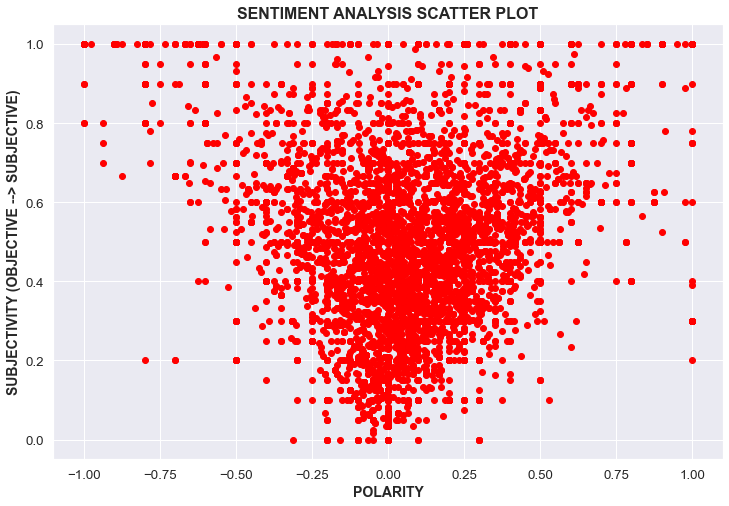

In [68]:
#Creating a scatter plot to show the subjectivity and the polarity
plt.figure(figsize=(12,8))
plt.scatter(x = 'polarity' , y = 'subjectivity', 
            data = df, color = "red")
plt.title('SENTIMENT ANALYSIS SCATTER PLOT', weight = 'bold', fontsize= 16)
plt.xlabel('POLARITY', weight = 'bold', fontsize= 14)
plt.ylabel('SUBJECTIVITY (OBJECTIVE --> SUBJECTIVE)', weight = 'bold', fontsize= 14)
plt.show()

In [41]:
df.sentiment.value_counts()

Neutral     5034
Positive    3368
Negative    2015
Name: sentiment, dtype: int64

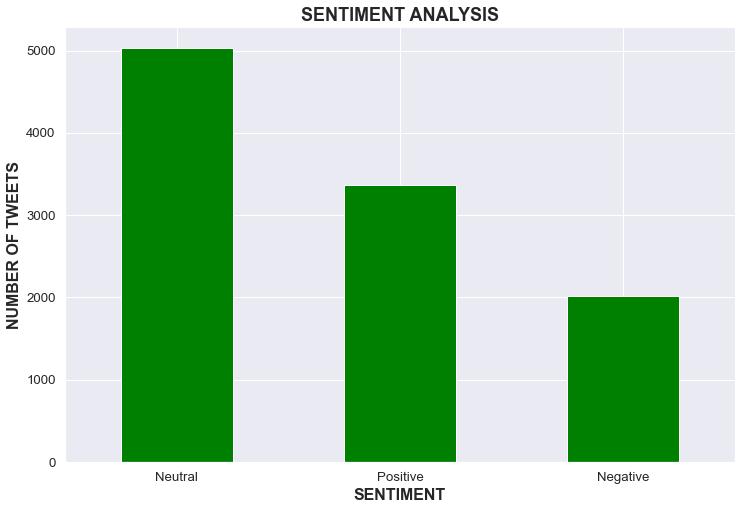

In [64]:
#plotting a bar chart to show the count of Positive, Neutral, and Negative sentiments
plt.figure(figsize=(12,8))
df['sentiment'].value_counts().plot(kind='bar', rot = 0, color= 'green')
plt.title('SENTIMENT ANALYSIS' , weight = 'bold', fontsize= 18)
plt.xlabel('SENTIMENT' , weight = 'bold', fontsize= 16)
plt.ylabel('NUMBER OF TWEETS' , weight = 'bold', fontsize= 16)
plt.show()

Creating a countplot to display the sentiment rating for total tweets for each date across the period

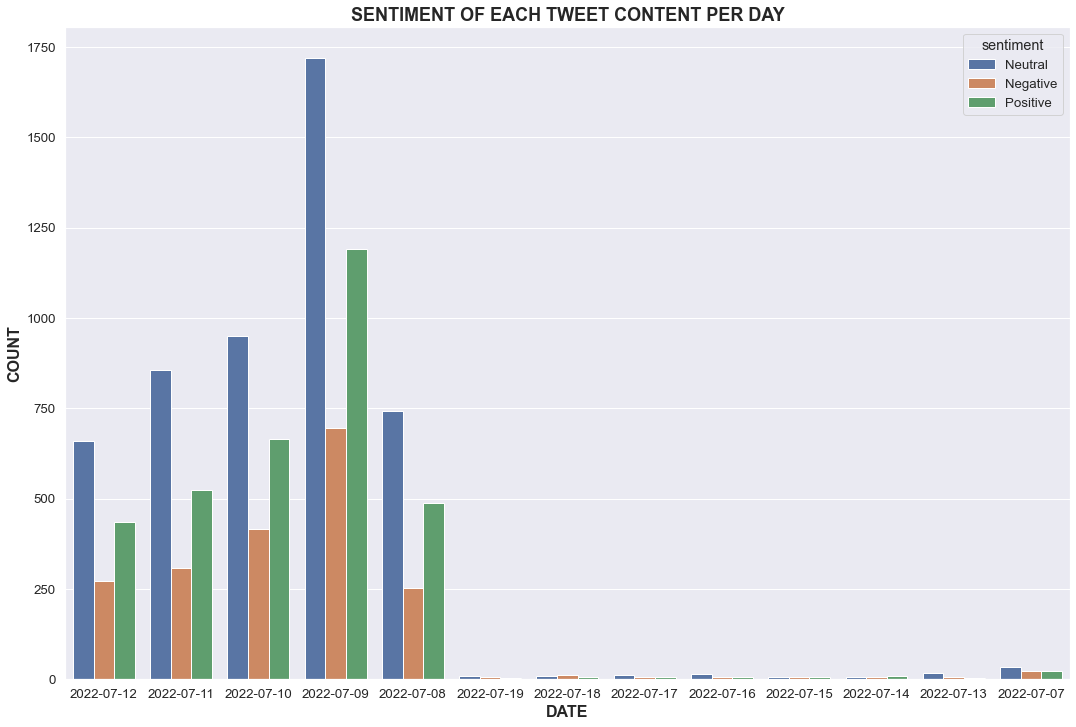

In [73]:
plt.figure(figsize=(18,12))
sns.countplot(x = df.date, hue = df.sentiment, data = df)
plt.title('SENTIMENT OF EACH TWEET CONTENT PER DAY' , weight = 'bold', fontsize= 18)
plt.xlabel('DATE' , weight = 'bold', fontsize= 16)
plt.ylabel('COUNT' , weight = 'bold', fontsize= 16)
plt.show()